In [1]:
import os
import sys
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append(os.path.join(os.path.dirname(""),".."))

import numpy
import custom
import torch
import torch.nn as nn
import pandas
import matplotlib.pyplot as plt

In [2]:
def make_word_pair(comatrix) :
    word_pair = []
    rows = comatrix.shape[0]
    cols = comatrix.shape[1]
    for r in range(rows) :
        for c in range(cols) :
            if comatrix[r][c] > 0 :
                word_pair.append([r,c])
        
    return numpy.array(word_pair)

In [3]:
sentences = [
    'He is a king.',
    'She is a queen.',
    'He is a man.',
    'She is a woman.',
    'Warsaw is Poland capital.',
    'Berlin is Germany capital.',
    'Paris is France capital.',
    'Seoul is Korea capital.', 
    'Bejing is China capital.',
    'Tokyo is Japan capital.',
]

word_dict, number_dict = custom.make_dict(sentences)
corpus = custom.word_num_encoding(sentences, word_dict)
comatrix = custom.make_comatrix(corpus, len(word_dict), window_size=2)

print(word_dict)
print(corpus)
print(comatrix)

{'<pad>': 0, '<unk>': 1, 'he': 2, 'is': 3, 'a': 4, 'king': 5, 'she': 6, 'queen': 7, 'man': 8, 'woman': 9, 'warsaw': 10, 'poland': 11, 'capital': 12, 'berlin': 13, 'germany': 14, 'paris': 15, 'france': 16, 'seoul': 17, 'korea': 18, 'bejing': 19, 'china': 20, 'tokyo': 21, 'japan': 22}
[[ 2  3  4  5]
 [ 6  3  4  7]
 [ 2  3  4  8]
 [ 6  3  4  9]
 [10  3 11 12]
 [13  3 14 12]
 [15  3 16 12]
 [17  3 18 12]
 [19  3 20 12]
 [21  3 22 12]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 4. 1. 2. 1. 1. 1. 1. 1. 6. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 2. 4. 0. 1. 2. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [4]:
word_pair = make_word_pair(comatrix)

print(word_pair)

[[ 2  3]
 [ 2  4]
 [ 3  2]
 [ 3  4]
 [ 3  5]
 [ 3  6]
 [ 3  7]
 [ 3  8]
 [ 3  9]
 [ 3 10]
 [ 3 11]
 [ 3 12]
 [ 3 13]
 [ 3 14]
 [ 3 15]
 [ 3 16]
 [ 3 17]
 [ 3 18]
 [ 3 19]
 [ 3 20]
 [ 3 21]
 [ 3 22]
 [ 4  2]
 [ 4  3]
 [ 4  5]
 [ 4  6]
 [ 4  7]
 [ 4  8]
 [ 4  9]
 [ 5  3]
 [ 5  4]
 [ 6  3]
 [ 6  4]
 [ 7  3]
 [ 7  4]
 [ 8  3]
 [ 8  4]
 [ 9  3]
 [ 9  4]
 [10  3]
 [10 11]
 [11  3]
 [11 10]
 [11 12]
 [12  3]
 [12 11]
 [12 14]
 [12 16]
 [12 18]
 [12 20]
 [12 22]
 [13  3]
 [13 14]
 [14  3]
 [14 12]
 [14 13]
 [15  3]
 [15 16]
 [16  3]
 [16 12]
 [16 15]
 [17  3]
 [17 18]
 [18  3]
 [18 12]
 [18 17]
 [19  3]
 [19 20]
 [20  3]
 [20 12]
 [20 19]
 [21  3]
 [21 22]
 [22  3]
 [22 12]
 [22 21]]


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

tensor_x = torch.tensor(word_pair[:,0], dtype = torch.long, device = device)
tensor_t = torch.tensor(word_pair[:,1], dtype = torch.long, device = device)


In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class NN(nn.Module) :
    def __init__(self, word_size) :
        super().__init__();
        self.f = nn.Embedding(word_size, 2, max_norm=1, padding_idx=0)
        self.g = nn.Linear(2, word_size)
    def forward(self, x) :
        y = self.f(x)
        y = self.g(y)
        return y

F = NN(len(word_dict))
F = F.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(F.parameters(), lr = 0.05)
epoch = 3000

for e in range(epoch) :
    tensor_y = F(tensor_x)

    loss = loss_function(tensor_y, tensor_t)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (e+1) % 100 == 0 :
        print("epoch {} | loss {}".format(e+1, loss))

epoch 100 | loss 2.0783469676971436
epoch 200 | loss 2.033588171005249
epoch 300 | loss 2.0172691345214844
epoch 400 | loss 2.007211446762085
epoch 500 | loss 2.00106143951416
epoch 600 | loss 1.996698021888733
epoch 700 | loss 1.9926135540008545
epoch 800 | loss 1.9893933534622192
epoch 900 | loss 1.986588478088379
epoch 1000 | loss 1.9841699600219727
epoch 1100 | loss 1.9821289777755737
epoch 1200 | loss 1.9803627729415894
epoch 1300 | loss 1.9788413047790527
epoch 1400 | loss 1.9789361953735352
epoch 1500 | loss 1.9763262271881104
epoch 1600 | loss 1.9756923913955688
epoch 1700 | loss 1.9736319780349731
epoch 1800 | loss 1.9724916219711304
epoch 1900 | loss 1.9715235233306885
epoch 2000 | loss 1.970961093902588
epoch 2100 | loss 1.9701670408248901
epoch 2200 | loss 1.970322847366333
epoch 2300 | loss 1.9683059453964233
epoch 2400 | loss 1.9676076173782349
epoch 2500 | loss 1.9680038690567017
epoch 2600 | loss 1.9663622379302979
epoch 2700 | loss 1.9657829999923706
epoch 2800 | loss 

In [7]:
F = F.to("cpu")
vector_df = pandas.DataFrame(F.state_dict()['f.weight'].numpy(), columns = ['a','b'])
vector_df['word'] = list(word_dict.keys())

print(vector_df)

           a         b     word
0   0.000000  0.000000    <pad>
1   0.369171 -1.211002    <unk>
2   0.926555  0.504530       he
3   0.051606 -0.967684       is
4  -0.045776 -0.909043        a
5   0.921051  0.512155     king
6   0.930943  0.497092      she
7   0.927485  0.503874    queen
8   0.913838  0.521525      man
9   0.928592  0.502191    woman
10 -0.625471  0.794291   warsaw
11  0.242522 -0.768587   poland
12 -0.719435  0.729619  capital
13 -0.623696  0.794464   berlin
14  0.246659 -0.768313  germany
15 -0.626026  0.794167    paris
16  0.242153 -0.768209   france
17 -0.622911  0.794620    seoul
18  0.779861 -0.615595    korea
19 -0.624241  0.794370   bejing
20  0.248398 -0.767863    china
21 -0.625267  0.794303    tokyo
22  0.414948 -0.814528    japan


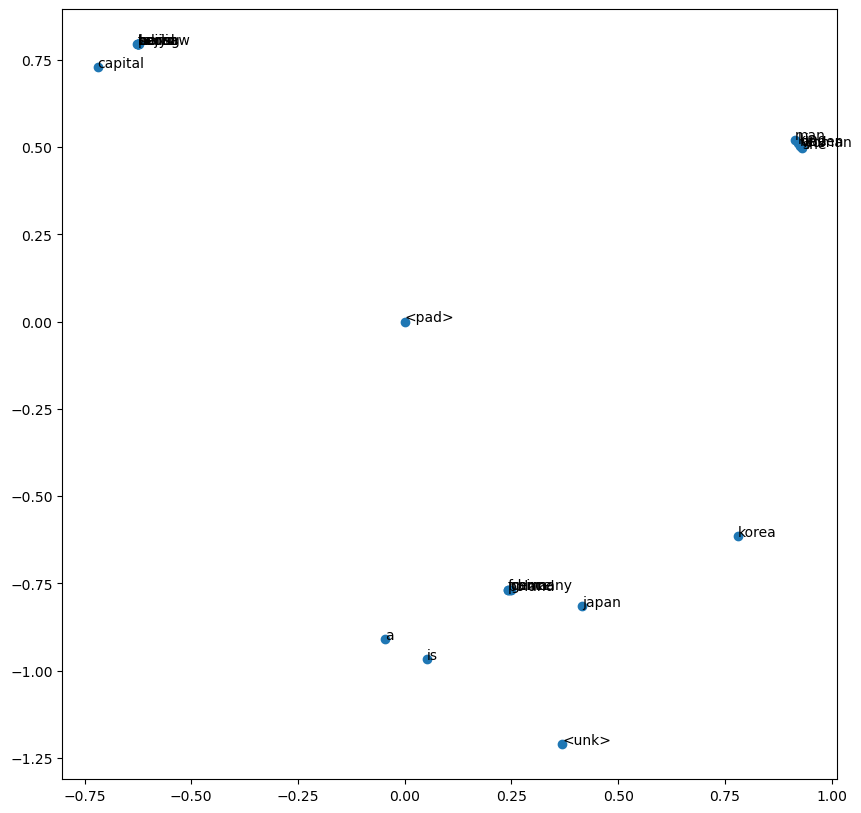

In [8]:
ano = vector_df['word'].values.tolist()
a = vector_df['a'].values.tolist()
b = vector_df['b'].values.tolist()

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(a,b)

for i in range(len(ano)) :
    ax.annotate(ano[i], (a[i], b[i]))

plt.show()

In [9]:
test = nn.Linear(5,2)
a = torch.randn(1,5)

print(test(a))
print(numpy.dot(a.numpy(), test.state_dict()['weight'].T.numpy()) + test.state_dict()['bias'].numpy())

tensor([[-0.0277, -0.8282]], grad_fn=<AddmmBackward0>)
[[-0.02767074 -0.828161  ]]
